Full name: ***Moldir Koishybayeva*** <br>

<h4 align="center"> <b>Mini Project </h4>

*Importing libraries to call necessary functions*

In [ ]:
from bs4 import BeautifulSoup # for web scraping
import requests  #to get html code of the site
import re #for working with substring
import pandas as pd #to store scraped data in dataframe
from datetime import datetime #working with timeseries
from datetime import date

*Each link contains dates and links to articles*

In [ ]:
articles_2019_link='https://edition.cnn.com/article/sitemap-2019-12.html'
articles_2020_link='https://edition.cnn.com/article/sitemap-2020-12.html'

In [ ]:
df=pd.DataFrame(columns=('ID','LINK','TITLE','DATE','AUTHOR','CATEGORY'))

*   Created function ***scrap_links()*** *with two arguments* *to avoid repeating the code* for each link (2019 and 2020)
*   ***Purpose ( scrap_links() ):*** to extract the links and to sort the dates
*   After calls another function ***scrap_data()*** *with two arguments*

In [ ]:
def scrap_links(articles,year):
  source = requests.get(articles).text
  articles = BeautifulSoup(source, 'lxml')

  Post= articles.find('div', class_='sitemap-entries') #part with links that we need 

  scraped_links=[]
  scraped_dates=[]

  end_date=date(year,12,15)
  start_date=date(year,12,1)

  for span in Post.find_all('span', class_='date'):
    try:  
      span_new =re.search('<span class="date">(.*)</span', str(span)).group(1)
      day=datetime.strptime(span_new,'%Y-%m-%d').date()
      scraped_dates.append(day)
    except Exception as e:
      if span is None:
        pass
    
  for span in Post.find_all('span',class_='sitemap-link'):
    links=span.find_all('a')
    for link in links:
      Link=link['href']
      scraped_links.append(Link)

  df_date=pd.DataFrame({'date':scraped_dates,'link':scraped_links})
  df_date=df_date.drop(df_date[df_date.date<start_date].index)
  df_date=df_date.drop(df_date[df_date.date>=end_date].index)
 
  links_list=df_date['link'].tolist()
  dates_list=df_date['date'].tolist()
  scrap_data(links_list,dates_list)


**Purpose**( ***scrap_data()*** function with 2 arg): <br> To take the title, author and category information for each article. Then insert it into the pandas dataframe.

In [ ]:
def scrap_data(scraped_links,scraped_dates):
  for x in range(len(scraped_links)):
    source = requests.get(scraped_links[x]).text
    articles_2019_1 = BeautifulSoup(source, 'lxml')

    Title=str(articles_2019_1.find(property="og:title")).replace("\n"," ")
    Author=str(articles_2019_1.find(itemprop="author")).replace("\n"," ")
    Categor=str(articles_2019_1.find(itemprop="keywords")).replace("'","")

    def get_substring(Title_col,Author_col,Categor_col):
      try:
        Title_col=re.search('<meta content="(.*)" property=', Title).group(1)
        Author_col=re.search('<meta content="(.*)" itemprop=', Author).group(1)
        Categor_col=re.search('<meta content=(.*),', Categor).group(1)
        Categor_col=Categor_col.replace('"','')
      except Exception as e:
        if Author_col==None:
          Author_col='NaN'
        if Categor_col==None:
          Categor_col='NaN'  
      df.loc[x]=[x+1,scraped_links[x],Title_col,scraped_dates[x],Author_col,Categor_col]
    get_substring(Title,Author,Categor)
  return df

In [ ]:
scrap_links(articles_2019_link,2019)
df_articles_2019=pd.DataFrame(df)

In [ ]:
df_articles_2019 #displaying pandas dataframe

,ID,LINK,TITLE,DATE,AUTHOR,CATEGORY
0,1,https://edition.cnn.com/2019/12/14/football/ba...,Barcelona draw with Real Sociedad opens door f...,2019-12-14,"Matias Grez, CNN",football
1,2,https://edition.cnn.com/2019/12/14/europe/fran...,100 Jewish graves were desecrated in France. A...,2019-12-14,"Saskya Vandoorne and Melissa Bell, CNN",europe
2,3,https://edition.cnn.com/2019/12/14/football/li...,Liverpool beat Watford to extend unbeaten Prem...,2019-12-14,"Matias Grez, CNN",football
3,4,https://edition.cnn.com/2019/12/14/sport/heism...,"Finalists from LSU, Oklahoma and OSU vie for t...",2019-12-14,"Wayne Sterling and Dakin Andone, CNN","sport, Heisman Trophy 2019: Finalists come fro..."
4,5,https://edition.cnn.com/2019/12/13/uk/uk-elect...,Boris Johnson has cleared an election hurdle. ...,2019-12-13,"Analysis by James Griffiths, CNN",uk
...,...,...,...,...,...,...
136,137,https://edition.cnn.com/2019/11/29/europe/lond...,This is what we know about London Bridge stabb...,2019-12-01,"Sebastian Shukla, Nicole Chavez and Hollie Sil...",europe
137,138,https://edition.cnn.com/2019/11/29/uk/london-b...,Suspect in deadly stabbing near London Bridge ...,2019-12-01,"Rob Picheta, Nicole Chavez and Nick Paton Wals...",uk
138,139,https://edition.cnn.com/2019/11/30/uk/london-b...,Acts of heroism emerge after London terror attack,2019-12-01,"Tara John, Vasco Cotovio and Lauren Kent, CNN",uk
139,140,https://edition.cnn.com/2019/12/01/motorsport/...,Lewis Hamilton wins season finale in Abu Dhabi,2019-12-01,"Ben Church, CNN",motorsport


In [ ]:
df=df[0:0]
scrap_links(articles_2020_link,2020)
df_articles_2020=pd.DataFrame(df)

In [ ]:
df_articles_2020

,ID,LINK,TITLE,DATE,AUTHOR,CATEGORY
0,1,https://edition.cnn.com/2020/12/14/sport/rugby...,A case of deja vu at the 2023 Rugby World Cup ...,2020-12-14,"Ben Church, CNN",sport
1,2,https://edition.cnn.com/2020/12/14/europe/belg...,Santa's care home visit may have infected 75 w...,2020-12-14,"Mick Krever and Jack Guy, CNN",europe
2,3,https://edition.cnn.com/2020/12/14/football/gr...,"Gérard Houllier, former Liverpool and France m...",2020-12-14,"Ben Morse, CNN","football, Gérard Houllier, former Liverpool an..."
3,4,https://edition.cnn.com/2020/12/12/sport/micha...,Phelps says next year's Olympic Games will not...,2020-12-14,"Don Riddell and Ben Church, CNN",sport
4,5,https://edition.cnn.com/2020/12/13/europe/germ...,Germany to go into national lockdown over Chri...,2020-12-14,"Claudia Otto, CNN",europe
...,...,...,...,...,...,...
105,106,https://edition.cnn.com/2020/12/01/football/di...,Prosecutors investigating potential gross negl...,2020-12-01,"Ben Church and Tatiana Arias, CNN",football
106,107,https://edition.cnn.com/2020/12/01/europe/hung...,Hungarian lawmaker resigns after caught fleein...,2020-12-01,"James Frater, CNN",europe
107,108,https://edition.cnn.com/2020/11/30/sport/first...,Callie Brownson of the Cleveland Browns is the...,2020-12-01,"Paul P. Murphy, CNN",sport
108,109,https://edition.cnn.com/2020/12/01/sport/kevin...,French sailor is rescued by rival after yacht ...,2020-12-01,"Ben Church, CNN",sport


***VISUALIZATION with MATPLOTLIB***

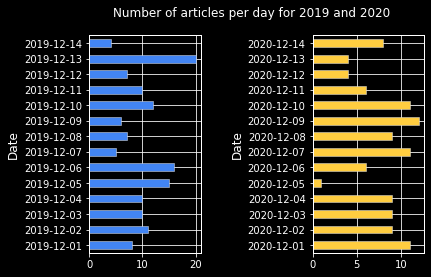

In [ ]:
import matplotlib.pyplot as plt

plt.subplots_adjust(wspace=1.0)
plt.suptitle("Number of articles per day for 2019 and 2020")
plt.subplot(121)
bg_info_2019=df_articles_2019['DATE'].value_counts().sort_index()
plt.style.use("dark_background")
bg_info_2019.plot.barh(color="#4285F4",edgecolor="#E0E0E0",linewidth=0.5,xlabel="Date")

plt.subplot(122)
bg_info_2020=df_articles_2020['DATE'].value_counts().sort_index()
plt.style.use("dark_background")
bg_info_2020.plot.barh(color="#FFCD40",edgecolor="#E0E0E0",linewidth=0.5,xlabel="Date")


plt.show()

TOP 10 Authors in 2020


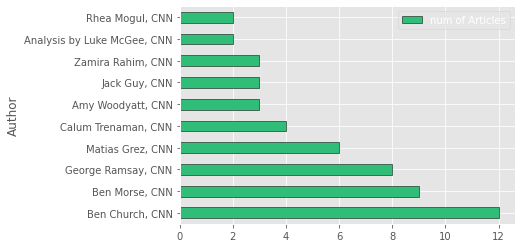

TOP 10 Authors in 2019


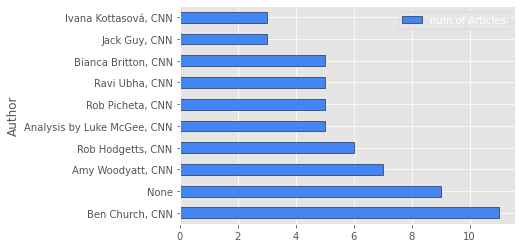

In [ ]:
from collections import Counter

list_2020=df_articles_2020['AUTHOR'].tolist()
counts=Counter(list_2020)
top_writers=pd.DataFrame(counts.most_common(10))
print("TOP 10 Authors in 2020")
top_writers.columns=['Author','num of Articles']
top_writers.plot.barh(x='Author',color='#2FBD78',edgecolor='black')
top_writers=plt.style.use("ggplot")
plt.show()

list_2019=df_articles_2019['AUTHOR'].tolist()
counts=Counter(list_2019)
top_writers=pd.DataFrame(counts.most_common(10))
print("TOP 10 Authors in 2019")
top_writers.columns=['Author','num of Articles']
top_writers.plot.barh(x='Author',color='#4285F4',edgecolor='black')
top_writers=plt.style.use("ggplot")
plt.show()

***USER INTERACTION***

In [ ]:
category_selected=input('Here you can write topic name:')
#football, sport, motorsport, uk,europe, australia
print('You have selected ',category_selected,' category. All related articles to this topic:')
df_category_selected=df_articles_2019.query("CATEGORY==@category_selected")[['ID','TITLE']]
df_category_selected

Here you can write topic name:football
You have selected  football  category. All related articles to this topic:


,ID,TITLE
0,1,Barcelona draw with Real Sociedad opens door f...
2,3,Liverpool beat Watford to extend unbeaten Prem...
10,11,Liverpool boss Klopp signs new deal until 2024
31,32,Football and food banks: How UK soccer fans ar...
35,36,Barcelona's Ansu Fati becomes youngest scorer ...
36,37,Cristiano Ronaldo targets sixth Champions Leag...
37,38,"Mocked by some, but 'green' soccer club wants..."
42,43,Premier League: Racist and homophobic incident...
51,52,Liverpool's Champions League hopes saved in 10...
62,63,Man arrested after racist incident mars Manche...


In [ ]:
ID_selected=int(input('Please,choose ID of the article that you are interested '))
Link_needed=df_articles_2019.query("ID == @ID_selected")[['LINK']]
pd.options.display.max_colwidth=300
Link_needed

Please,choose ID of the article that you are interested 135


,LINK
134,https://edition.cnn.com/2019/12/01/football/arsenal-norwich-draw-epl-spt-intl/index.html
